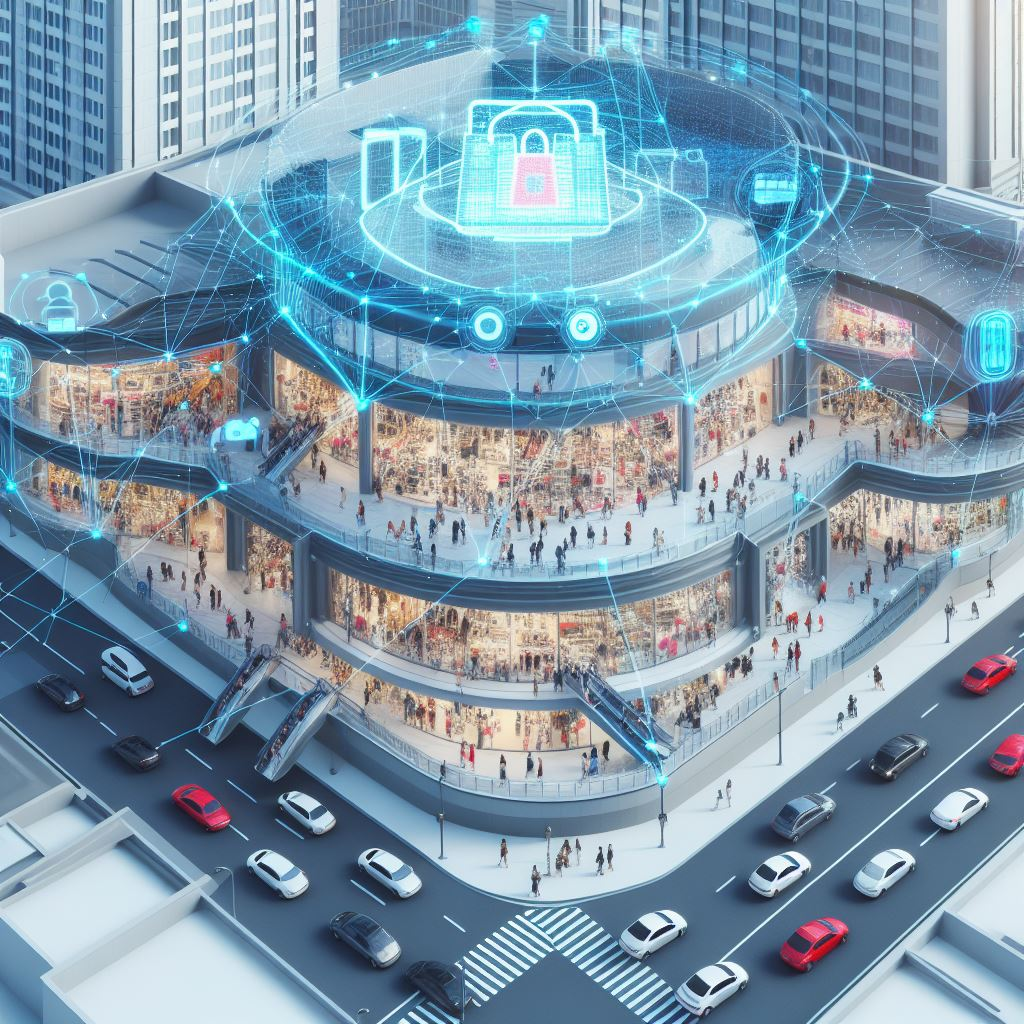

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". 

---

In this dataset, customers segmented according to the purchasing history obtained from the membership cards of a big mall.

Customer segmentation is a crucial data analysis method used by businesses to understand and manage their customer base. This strategy aims to make more effective decisions in areas such as marketing, sales, and customer relationship management by identifying customer groups with similar characteristics. Customer segmentation is an important strategy for businesses to enhance their competitive advantage and provide better customer experiences. Clustering algorithms like **KMeans and Hierarchical Clustering** enable effective customer segmentation even with large datasets. Proper implementation of these algorithms can assist businesses in optimizing their customer-focused strategies.

# Introduction

## Dataset Overview
There is a large mall in a specific city that maintains information about its customers who subscribe to a membership card. The membership card provides the following information: gender, age, and annual income. Customers use this membership card for all their purchases in the mall, allowing the mall to have the purchase history of all subscribed members. Based on this information, the mall computes the spending score for all customers.

**Outline of the Study**  
* Introduction
* Import Libraries
* Load Dataset
* Exploratory Data Analysis and Visualizations  
* KMeans Clustering Analysis
* Hierarchical Clusturing
* Conclusion

## Attributes

**The dataset consists of following five features of 200 customers:**

**CustomerID**: Unique ID assigned to the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**Annual Income (k$)**: Annual Income of the customer

**Spending Score (1-100)**: Score assigned by the mall based on customer behavior and spending nature. As the score increases, the customer's spending amount also increase



**Contact**  
For questions, collaborations, or further discussions, feel free to reach out on [LinkedIn](https://www.linkedin.com/in/huriye-büyükpancar-530154239)

Also, you can reach the original dataset on [this link](https://www.kaggle.com/nelakurthisudheer/mall-customer-segmentation)



---
---

# Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf 

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")



## Load Dataset 

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis and Visualizations

## Decriptive Statistics



In [7]:
# The columns have been renamed for a more straightforward data exploration process.
df.columns = [col.split('(')[0].strip() for col in df.columns]

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df_copy = df.copy()

In [10]:
df.shape

(200, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [13]:
df.duplicated().sum()

0

## Visualization

In [24]:
df.iplot(kind="box")


In [25]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

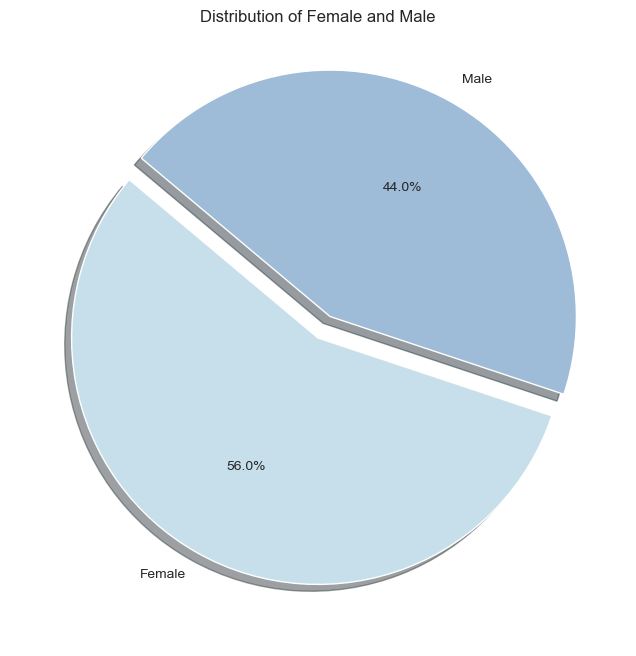

In [26]:
colors =sns.color_palette("ch:s=.25,rot=-.25")

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
explode = (0, 0.1)
plt.pie(df['Gender'].value_counts(), explode=explode, labels=['Female', 'Male'], autopct='%1.1f%%',
        colors=colors, shadow=True, startangle=140)

# Grafiği düzenle
plt.title('Distribution of Female and Male')
plt.axis('off')
plt.show()

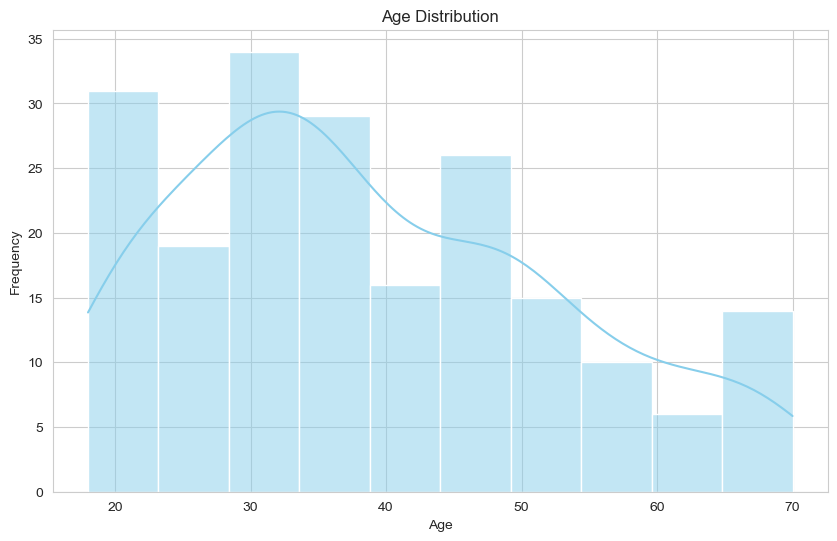

In [27]:
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

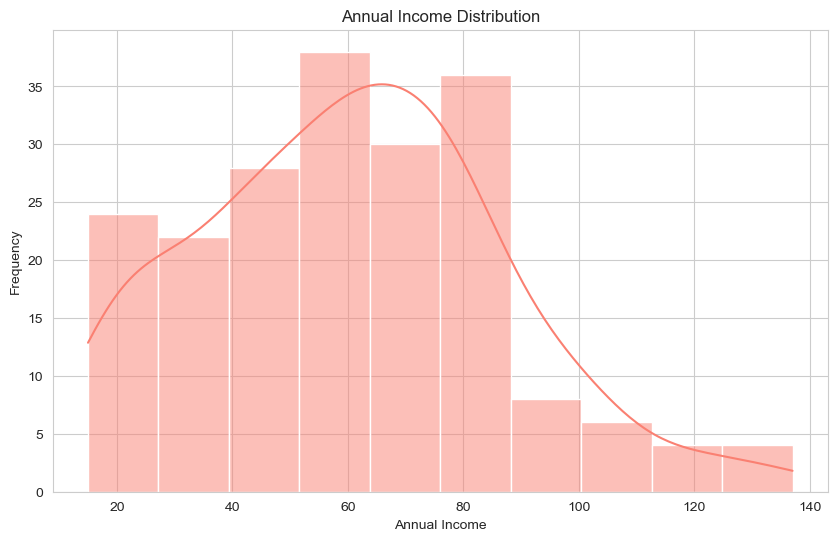

In [29]:
sns.histplot(df['Annual Income'], bins=10, kde=True, color='salmon')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

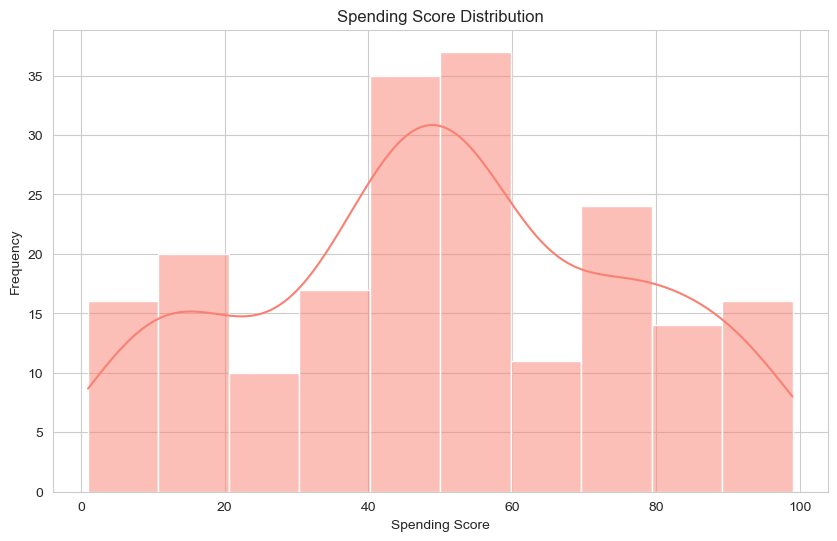

In [31]:
sns.histplot(df['Spending Score'], bins=10, kde=True, color='salmon')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()


<Figure size 800x600 with 0 Axes>

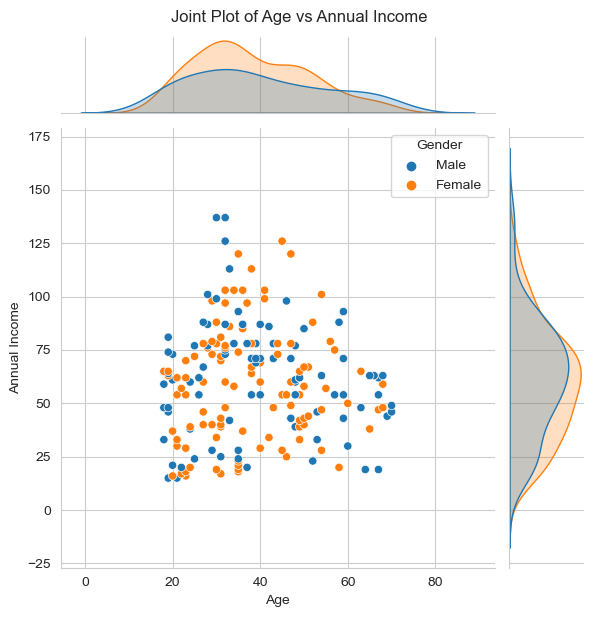

In [32]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='Age', y='Annual Income', data=df, kind='scatter', hue="Gender")
plt.suptitle('Joint Plot of Age vs Annual Income', y=1.02)
plt.show()

<Figure size 800x600 with 0 Axes>

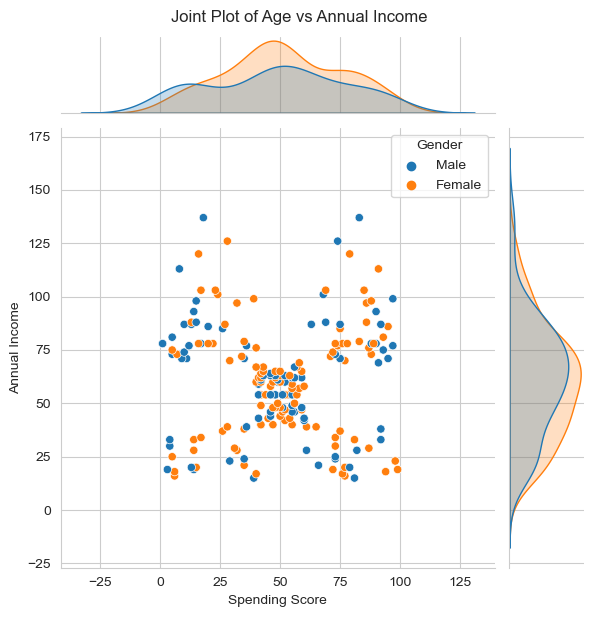

In [33]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='Spending Score', y='Annual Income', data=df, kind='scatter', hue ="Gender")
plt.suptitle('Joint Plot of Age vs Annual Income', y=1.02)
plt.show()

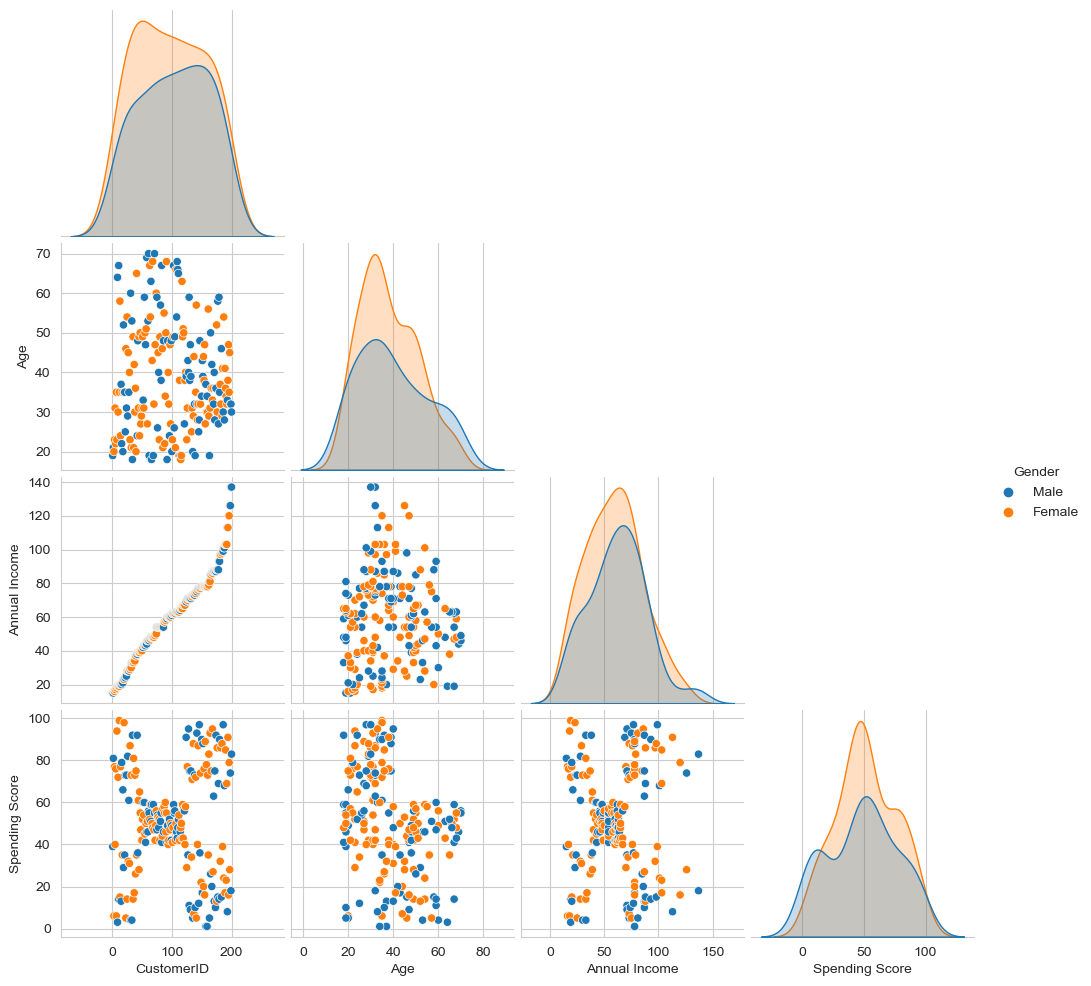

In [34]:
sns.pairplot(df, hue="Gender",corner=True)
plt.show()

## Encoding

In [35]:
df['Gender Encoded'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Gender Encoded
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


## Correlations and Multicollinearity

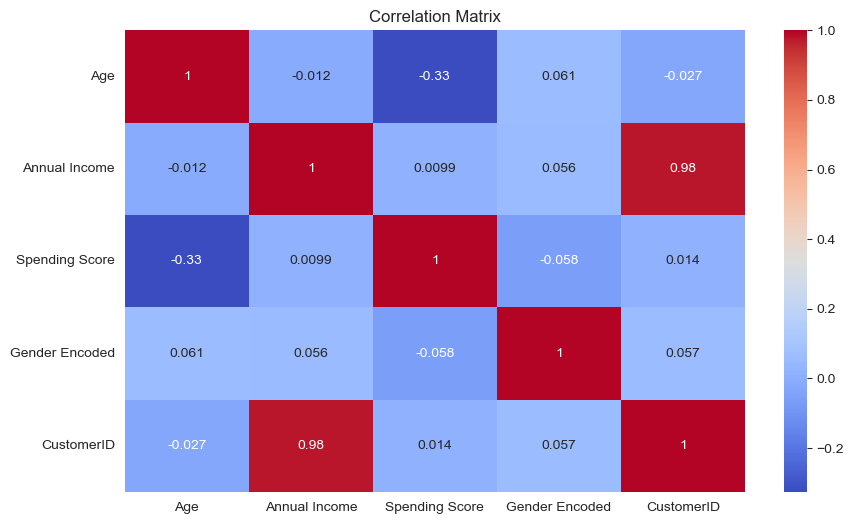

In [39]:
selected_columns = ['Age', 'Annual Income', 'Spending Score', 'Gender Encoded', 'CustomerID']

correlation_matrix = df[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [40]:
# Due to the multicollinearity between the 'annual income' column and the 'customer id' column, and 
# Considering that the 'customer id' essentially serves as an index, the 'customer id' column was dropped

df.drop("CustomerID", inplace=True, axis=1)

In [41]:
# The 'Gender' column was dropped as it was encoded

df.drop("Gender", inplace=True, axis=1)

In [42]:
df.head()

,Age,Annual Income,Spending Score,Gender Encoded
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [44]:
df2_copy = df.copy()

# Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to be scaled
numeric_columns = ['Age', 'Annual Income', 'Spending Score']

# Create a copy of the original numerical columns into a new DataFrame
df_scaled = df[numeric_columns].copy()

# Use StandardScaler to scale the selected numerical columns
scaler = StandardScaler()
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled)

# Drop the original numerical columns from the original dataset
df = df.drop(columns=numeric_columns)

# Concatenate the scaled numerical columns with the original dataset
df_std = pd.concat([df, df_scaled], axis=1)

# Display the modified dataset
print(df_std.head())

   Gender Encoded       Age  Annual Income  Spending Score
0               1 -1.424569      -1.738999       -0.434801
1               1 -1.281035      -1.738999        1.195704
2               0 -1.352802      -1.700830       -1.715913
3               0 -1.137502      -1.700830        1.040418
4               0 -0.563369      -1.662660       -0.395980


In [47]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns to be scaled
numeric_columns = ['Age', 'Annual Income', 'Spending Score']

df=df2_copy.copy()

# Create a copy of the original numerical columns into a new DataFrame
df_scaled = df[numeric_columns].copy()

# Use StandardScaler to scale the selected numerical columns
scaler = MinMaxScaler()
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled)

# Drop the original numerical columns from the original dataset
df = df.drop(columns=numeric_columns)

# Concatenate the scaled numerical columns with the original dataset
df_min_max = pd.concat([df, df_scaled], axis=1)

# Display the modified dataset
print(df_min_max.head())

df = df_copy.copy()

   Gender Encoded       Age  Annual Income  Spending Score
0               1  0.019231       0.000000        0.387755
1               1  0.057692       0.000000        0.816327
2               0  0.038462       0.008197        0.051020
3               0  0.096154       0.008197        0.775510
4               0  0.250000       0.016393        0.397959


#  Cluster Analysis

## Apply K Means

### Hopkins Test

Hopkins test is a preliminary test used to assess whether meaningful clustering can be performed within a dataset
If the Hopkins test returns a low value (less than 0.5), the dataset is considered more suitable for Clustering_Analysis_Customers_Segmentation_Project

In [48]:
# The results of the Hopkins test were compared to determine which scaling method to proceed with

In [49]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


In [50]:
hopkins(df_std, df.shape[0])   # The dataset is suitable for clustering.

0.3095969068597565

In [51]:
hopkins(df_min_max, df.shape[0]) # The dataset is suitable for clustering.

0.207686530032276

**We continue with MinMax Scaler as the results of the Hopkins Test indicate better performance with MinMax Scaler.**

In [52]:
df = df_min_max.copy()
df3_copy =df.copy()

### Clustering based on Age and Spending Score - X1

#### *Creating a new dataset with two variables of Age and Spending Score*

In [54]:
X1 = pd.DataFrame(df[["Age", "Spending Score"]])

In [55]:
X1.head()

,Age,Spending Score
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


In [56]:
hopkins(X1, X1.shape[0]) 

0.2948534963525035

In [57]:
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)

####  Determining optimal number of clusters

##### Elbow Method

In [85]:
from sklearn.cluster import KMeans

In [86]:

ssd = []    # inertia  .. SSD, "Sum of Squared Distances" 

K = range(2,10)   

for k in K:                                          
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)

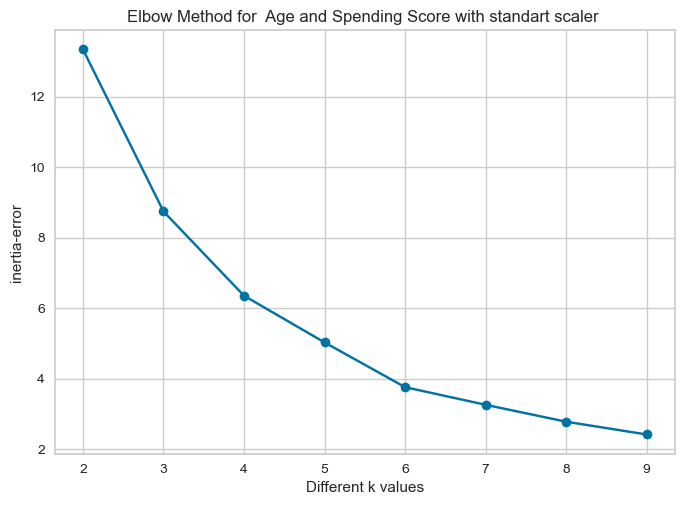

In [87]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("Elbow Method for  Age and Spending Score with standart scaler ") 
plt.show()

In [88]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,4.595648
3,2.391993
4,1.323906
5,1.269999
6,0.500834
7,0.479672
8,0.362508


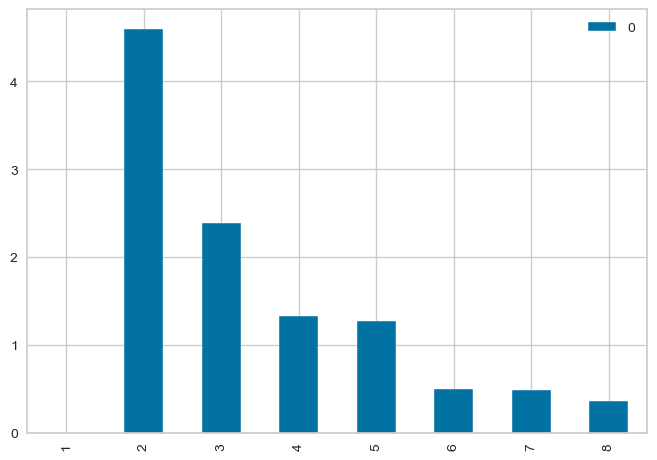

In [89]:
df_diff.plot(kind='bar'); 


**The sharpest decline is observed at 3. However, we will also attempt to confirm this through Yellowbrick**

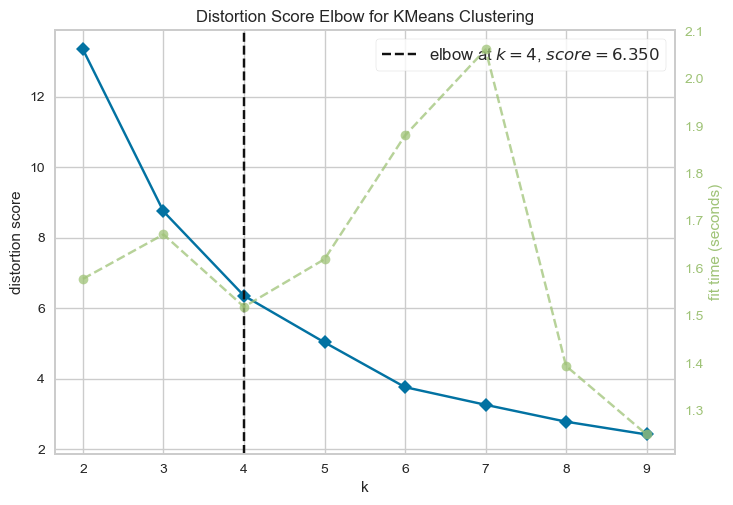

In [90]:
from yellowbrick.cluster import KElbowVisualizer   

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X1)       
visualizer.show();

In [91]:
from sklearn.metrics import silhouette_score

In [92]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4725286522869679
For n_clusters=3, the silhouette score is 0.4405822168301055
For n_clusters=4, the silhouette score is 0.43592419579778224
For n_clusters=5, the silhouette score is 0.4462533058710072
For n_clusters=6, the silhouette score is 0.4554676382159924
For n_clusters=7, the silhouette score is 0.4097179595231677
For n_clusters=8, the silhouette score is 0.4038658615761099


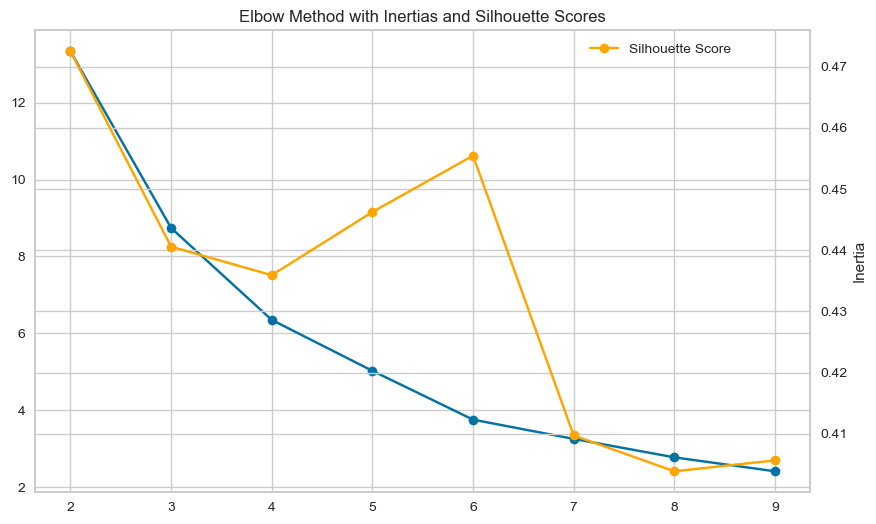

In [93]:
# Elbow ve Silhoutee skorunu bir arada gösteren grafik

inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X1)
    silhouette = silhouette_score(X1, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

**According to the analysis of the Elbow method and silhouette score, choosing 3 as the appropriate number of clusters is recommended**

#### Visualizing  All the Clusters

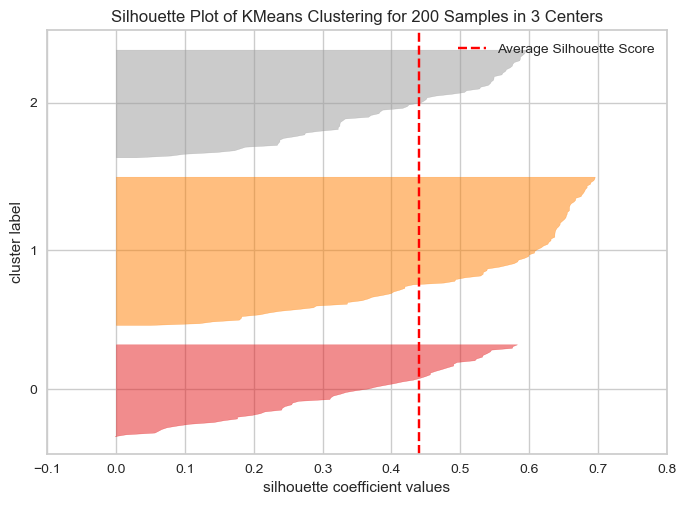

In [94]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42) 
visualizer = SilhouetteVisualizer(model3)

# Fit the data to the visualizer
visualizer.fit(X1)    
visualizer.poof();

In [95]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X1)

array([0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1,
       0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [96]:
model.labels_ 

array([0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1,
       0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [97]:
clusters_X1 = model.labels_

In [98]:
X1_silhouette = silhouette_score(X1, clusters_X1,random_state=42)
X1_silhouette

0.4405822168301055

**The Silhouette score, ranging from 0 to 1, is 0.44058. This value indicates a moderately good clustering performance. The ideal scenario is the score approaching 1; however, a value like 0.44058 is generally considered acceptable, representing meaningful clustering performance.**

### Clustering based on Annual Income and Spending Score - X2

#### Creating a new dataset with two variables of Annual Income and Spending Score

In [99]:
X2=df2_copy[["Annual Income", "Spending Score"]]

#### Determining optimal number of clusters

In [100]:
hopkins(X2, X2.shape[0]) #Suitable for clustering

0.29450640894966584

In [101]:
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X2)

In [102]:
ssd = [] # sum of squared distance
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X2)
    ssd.append(model.inertia_)

In [103]:
ssd

[13.993505283127973,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.098385141882586,
 2.64164173765563,
 2.2192661194301877,
 1.8777497198597066]

Text(0.5, 1.0, 'elbow method')

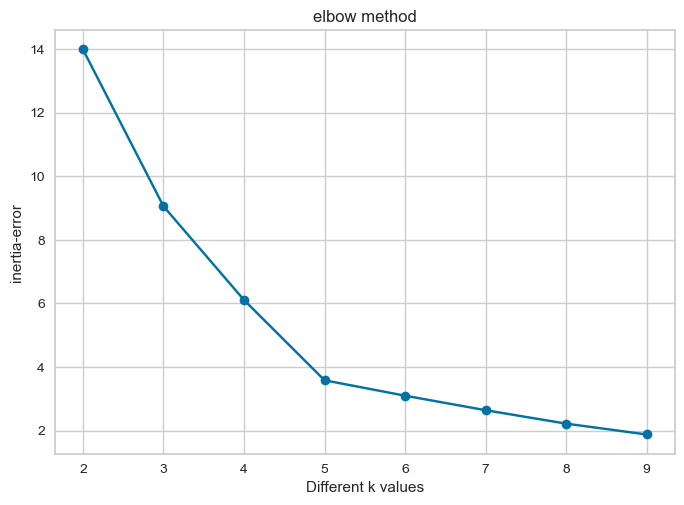

In [104]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

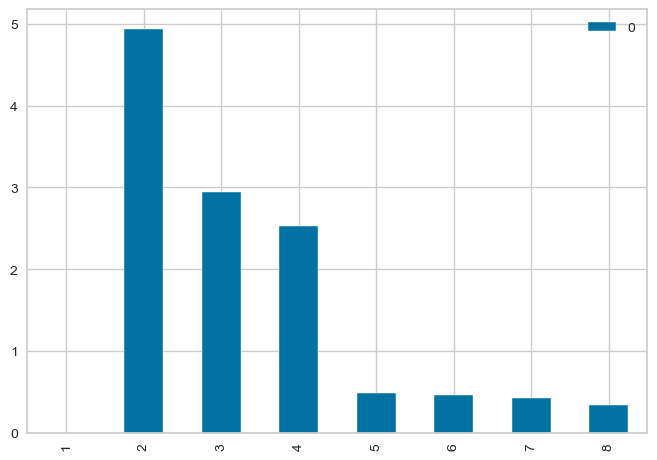

In [105]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff
df_diff.plot(kind='bar');

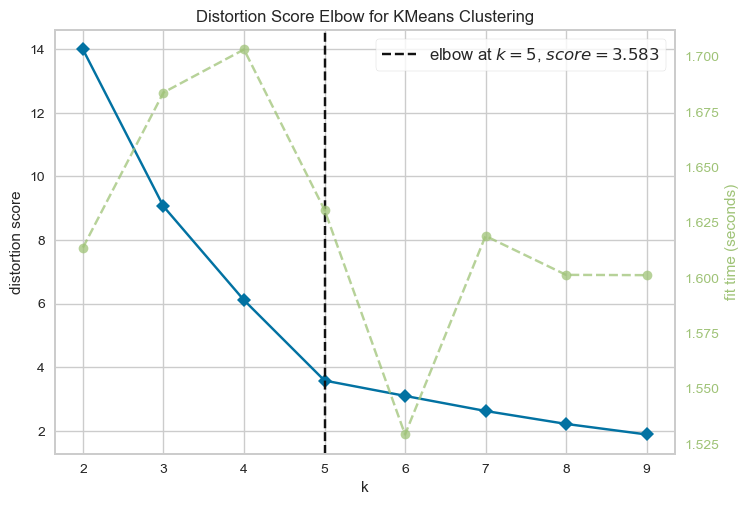

In [106]:
model_ = KMeans(random_state=42)

visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(X2)       
visualizer.show();

In [107]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.33340205479521
For n_clusters=3, the silhouette score is 0.4514909309424474
For n_clusters=4, the silhouette score is 0.49620078745146784
For n_clusters=5, the silhouette score is 0.5594854531227246
For n_clusters=6, the silhouette score is 0.5352219865099995
For n_clusters=7, the silhouette score is 0.5166084988443767
For n_clusters=8, the silhouette score is 0.4358721749791494


In [108]:
model = KMeans(n_clusters=5, random_state=42)
model.fit_predict(X2)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [109]:
clusters_X2 = model.labels_

In [110]:
X2_silhouette = silhouette_score(X2, clusters_X2,random_state=42)
X2_silhouette

0.5594854531227246

**The Silhouette score, ranging from 0 to 1, is 0.5594. This value indicates a moderately good clustering performance. The ideal scenario is the score approaching 1; however, a value like 0.5594 is generally considered acceptable, representing meaningful clustering performance.**

## Hierarchical Clustering

### Determining optimal number of clusters using Dendogram

In [111]:
df_HC = df2_copy.copy()

In [112]:
scale = MinMaxScaler()
df_HC = scale.fit_transform(df_HC)

In [113]:
hc_ward = linkage (y= df_HC, method ="ward") 
hc_complete = linkage (df_HC, "complete")
hc_average = linkage (df_HC, "average")
hc_single= linkage(df_HC,"single") 

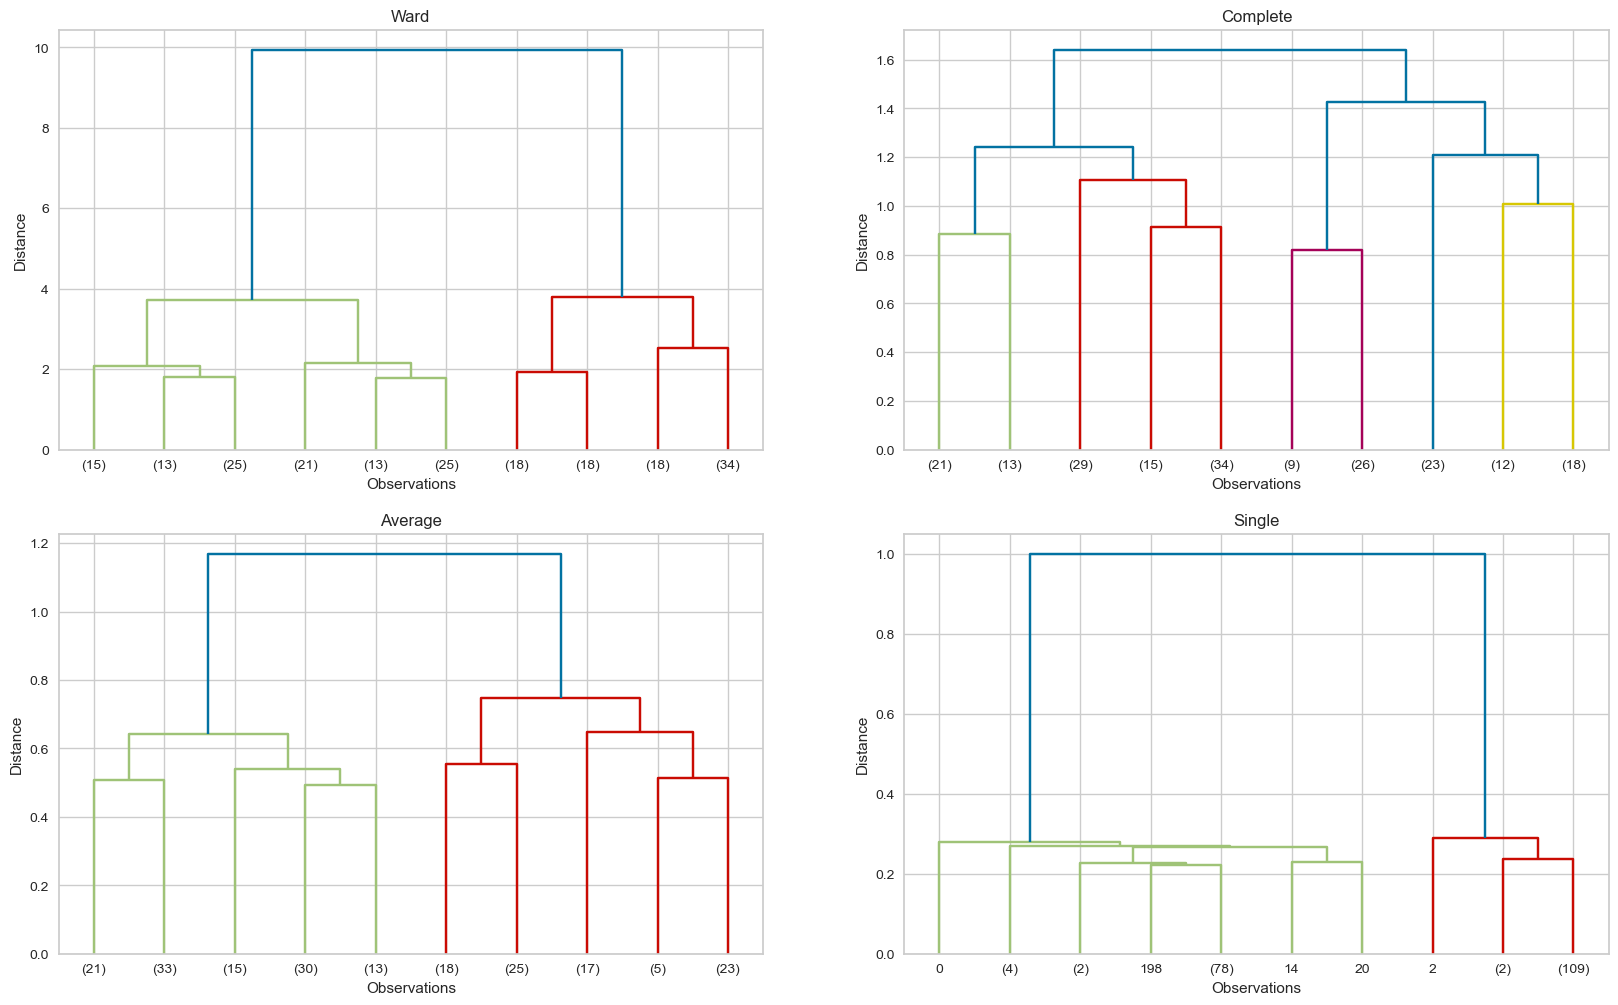

In [114]:

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);  

### Clustering based on Age and Spending Score- X1

In [116]:
X1_HC = df2_copy[["Age","Spending Score"]]

In [118]:
X1_HC.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [119]:
hopkins(X1_HC, X1_HC.shape[0]) #suitable for clustering

0.3313524634778315

In [120]:
scale=MinMaxScaler()
X1_HC = scale.fit_transform(X1_HC)

In [121]:
hc_ward = linkage (y= X1_HC, method ="ward") 
hc_complete = linkage (X1_HC, "complete") 
hc_average = linkage (X1_HC, "average") 
hc_single= linkage(X1_HC ,"single") 

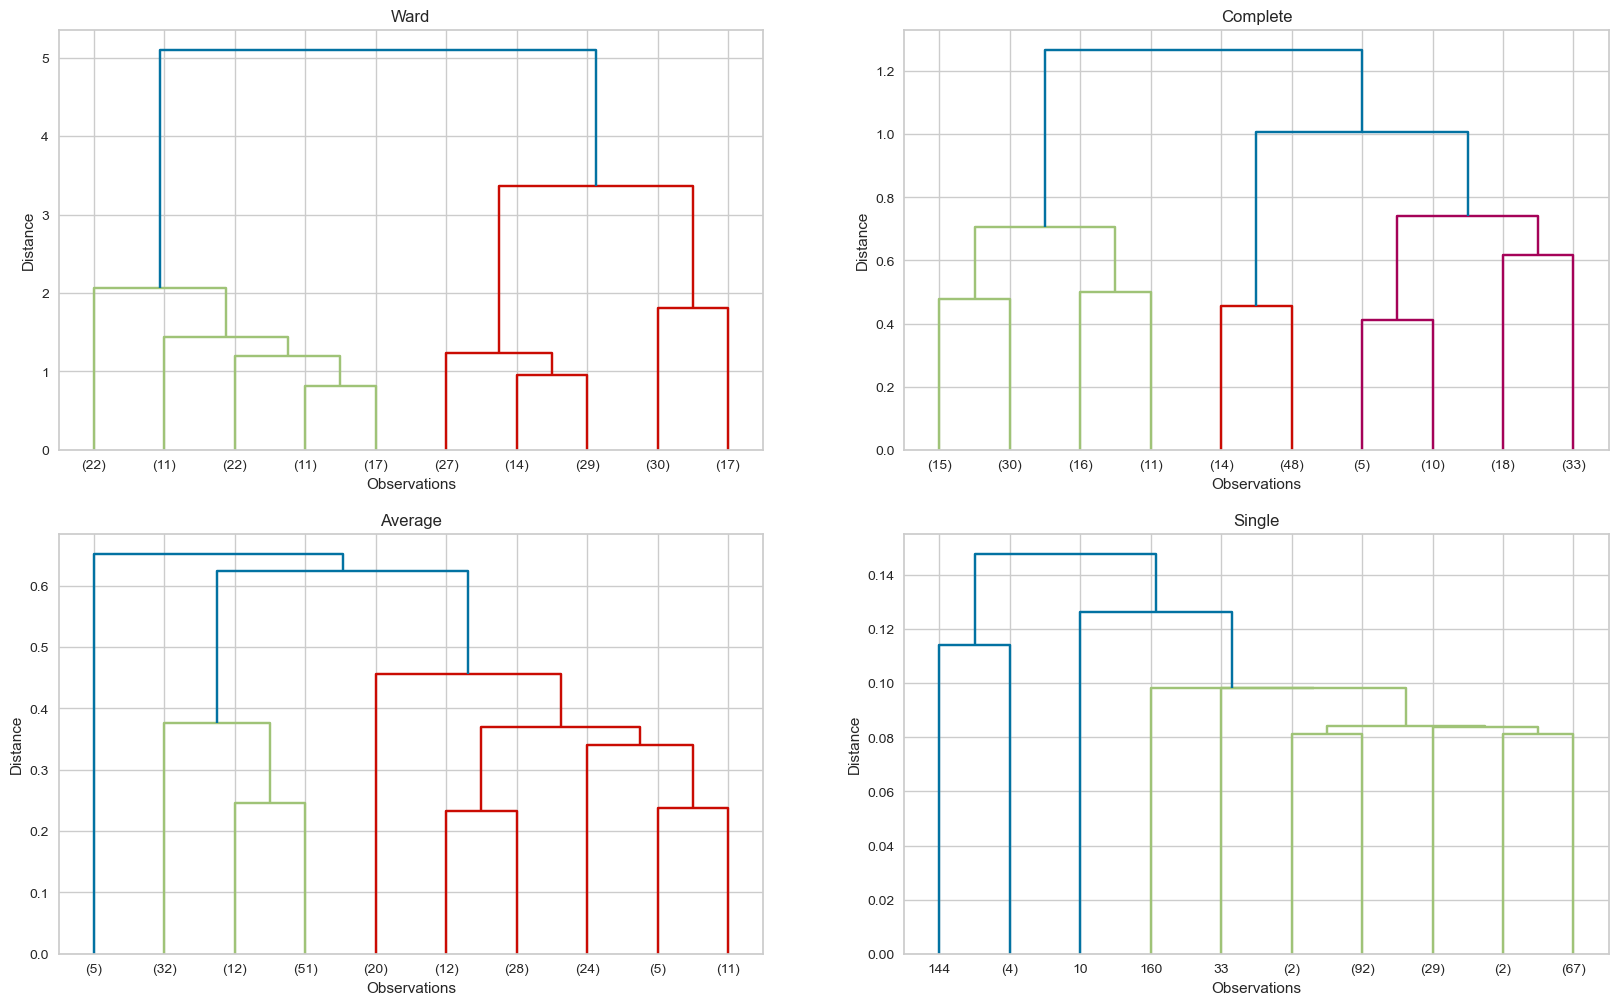

In [122]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10); 


In [123]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1_HC)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X1_HC, model.labels_)})

f'Silhouette Score for {2} clusters {0.41699937625242867}
f'Silhouette Score for {3} clusters {0.417124576652748}
f'Silhouette Score for {4} clusters {0.3898644314748176}
f'Silhouette Score for {5} clusters {0.37668241046330797}
f'Silhouette Score for {6} clusters {0.39920932010291066}
f'Silhouette Score for {7} clusters {0.3589298217276204}
f'Silhouette Score for {8} clusters {0.3611306861915168}
f'Silhouette Score for {9} clusters {0.3657953810746083}


**When clustering is attempted based on the age and spending score features using a Hierarchical model, the optimal number of clusters has been determined as 3**

In [124]:
model1 =  AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "ward") 
model1.fit_predict(X1_HC)

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2], dtype=int64)

In [125]:
clusters_X1HC = model1.labels_

In [126]:
X1_HC = silhouette_score(X1_HC, model1.labels_) 
X1_HC

0.417124576652748

**The Silhouette score, ranging from 0 to 1, is 0.4171. This value indicates a moderately good clustering performance. The ideal scenario is the score approaching 1; however, a value like 0.4171 is generally considered acceptable, representing meaningful clustering performance.**

### Clustering based on Annual Income and Spending Score- X2

In [128]:
X2_HC = df2_copy[["Annual Income","Spending Score"]]
X2_HC.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [129]:
hopkins(X2_HC, X2_HC.shape[0]) #Suitable for clustering

0.2956954591034405

In [130]:
X2_HC = scaler.fit_transform(X2_HC)

In [131]:
hc_ward = linkage (y= X2_HC, method ="ward") 
hc_complete = linkage (X2_HC, "complete") 
hc_average = linkage (X2_HC, "average") 
hc_single= linkage(X2_HC ,"single") 

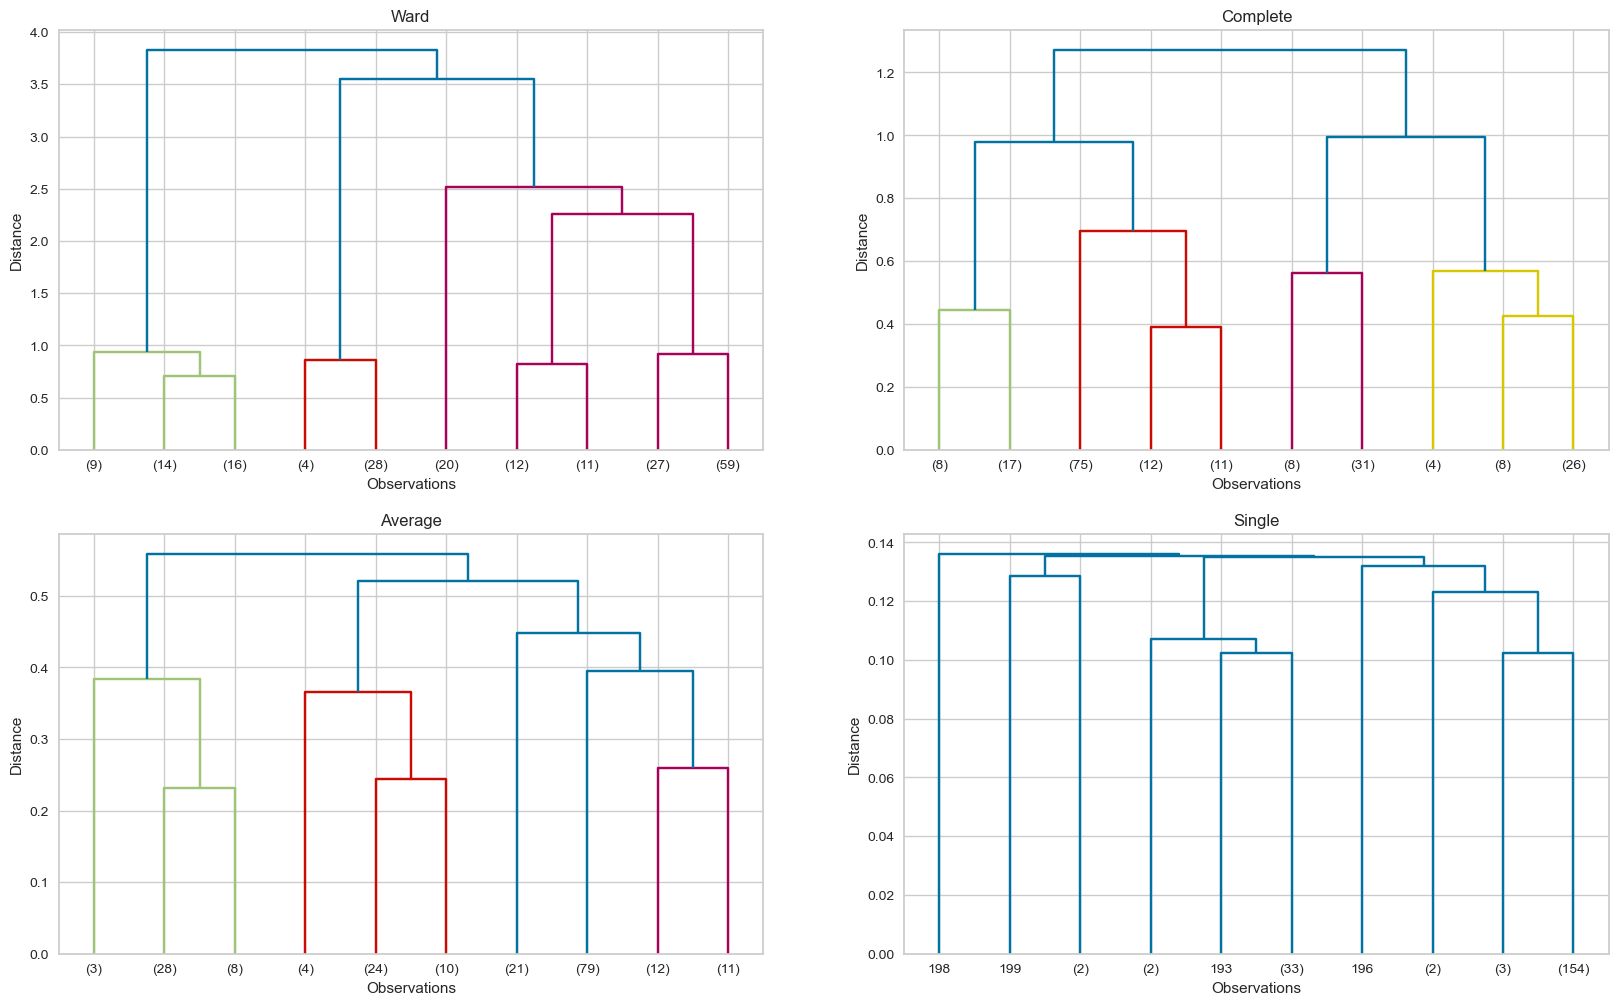

In [132]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10); 

In [133]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2_HC)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X2_HC, model.labels_)})

f'Silhouette Score for {2} clusters {0.39090074716611595}
f'Silhouette Score for {3} clusters {0.44796167261691394}
f'Silhouette Score for {4} clusters {0.4976418539903167}
f'Silhouette Score for {5} clusters {0.5582698727196419}
f'Silhouette Score for {6} clusters {0.5296670434232814}
f'Silhouette Score for {7} clusters {0.409308025869031}
f'Silhouette Score for {8} clusters {0.41055127971395405}
f'Silhouette Score for {9} clusters {0.4177210331066167}


In [134]:
model1 = AgglomerativeClustering(n_clusters=5 ,affinity = "euclidean", linkage = "ward")
model1.fit_predict(X2_HC)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [135]:
clusters_X2HC = model1.labels_

In [136]:
X2_HC = silhouette_score(X2_HC, model1.labels_) 
X2_HC

0.5582698727196419


**The Silhouette score, ranging from 0 to 1, is 0.5582 This value indicates a moderately good clustering performance. The ideal scenario is the score approaching 1; however, a value like 0.5582 is generally considered acceptable, representing meaningful clustering performance.**

# Conclusion

In [137]:
 silhouette_compare_score = pd.DataFrame({"X1_silhouette": [X1_silhouette],"X2_silhouette": [X2_silhouette],"X1_HC": [X1_HC],"X2_HC": [X2_HC]}, index = [0])
 silhouette_compare_score    

,X1_silhouette,X2_silhouette,X1_HC,X2_HC
0,0.440582,0.559485,0.417125,0.55827


**The best performance according to Silhouette scores is obtained from clustering results using the K-means algorithm based on  annual income and spending scores of customers**

### Visualizing and Labeling All the Clusters for Final Model

In [138]:
df_copy.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [139]:
df_final = df_copy.copy()
df_final["Costomer_Clusters"] = clusters_X2
df_final.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Costomer_Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


<Figure size 800x600 with 0 Axes>

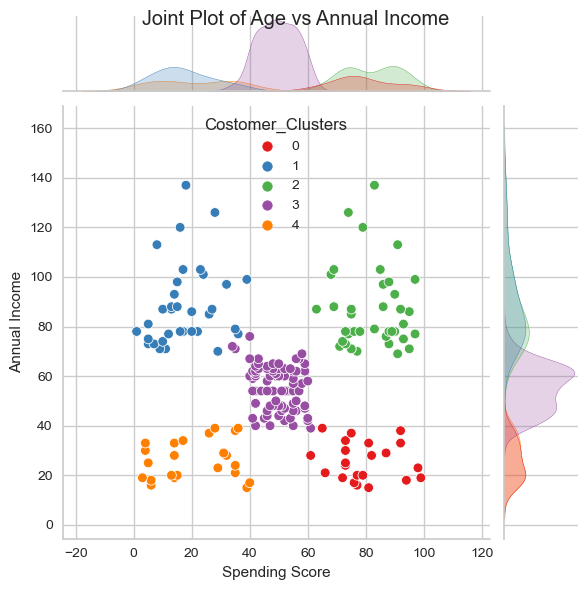

In [142]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='Spending Score', y='Annual Income', data=df_final, kind='scatter', hue ="Costomer_Clusters", palette="Set1")
plt.suptitle('Joint Plot of Age vs Annual Income')
plt.show()

## Bonus

When we requested ChatGPT to perform the labeling process by explaining customer features, which under normal circumstances, we would obtain from the customer or an expert, the labeling process was conducted as follows.

**Generous Gainers*** : A customer who earns little but spends a lot =>>> 0

**Savvy Savers** : A customer who earns a lot but spends little =>>> 1

**Prosperity Pioneers** : A customer who earns a lot and spends a lot. =>>> 2

**Equilibrium Explorers** : A customer with average income and spending. =>>>3

**Modest Managers** :A customer who earns little and spends little =>>> 4


In [143]:
# Define the mapping values
map_dict = {0: 'Generous Gainers', 1: 'Savvy Saver', 2: 'Prosperity Pioneers', 3: 'Equilibrium Explorers', 4: 'Modest Managers'}

# Use the map function to perform the assignment
df_final['Customer_Segmantation'] = df_final['Costomer_Clusters'].map(map_dict)

# Display the result
df_final.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Costomer_Clusters,Customer_Segmantation
0,1,Male,19,15,39,4,Modest Managers
1,2,Male,21,15,81,0,Generous Gainers
2,3,Female,20,16,6,4,Modest Managers
3,4,Female,23,16,77,0,Generous Gainers
4,5,Female,31,17,40,4,Modest Managers
